DATA PRE-PROCESSING

In [1]:
import pandas as pd
import numpy as np

## Load the client data
client_df = pd.read_csv('data_files/client.csv')

## Load the invoice data
invoice_df = pd.read_csv('data_files/invoice.csv')

In [2]:
## Identify missing data

print(client_df.isnull().sum())
print(invoice_df.isnull().sum())

region    0
date      0
dis       0
id        0
catg      0
target    0
dtype: int64
id                      0
date                    0
tarif_type              0
counter_statue          0
reading_remarque        0
consommation_level_4    0
months_number           0
counter_type            0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
dtype: int64


It can be observed that there are no missing data!

In [3]:
## Convert date columns to datetime format
client_df['date'] = pd.to_datetime(client_df['date'], errors='coerce')
invoice_df['date'] = pd.to_datetime(invoice_df['date'], errors='coerce')

## Check if any date conversions failed (i.e., resulted in NaT)
print(client_df[client_df['date'].isna()])
print(invoice_df[invoice_df['date'].isna()])

Empty DataFrame
Columns: [region, date, dis, id, catg, target]
Index: []
Empty DataFrame
Columns: [id, date, tarif_type, counter_statue, reading_remarque, consommation_level_4, months_number, counter_type, counter_coefficient, consommation_level_1, consommation_level_2, consommation_level_3]
Index: []


/var/folders/bk/h4fkjwr93xs0lvghl5fm63l40000gn/T/ipykernel_72089/1077722136.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  client_df['date'] = pd.to_datetime(client_df['date'], errors='coerce')
/var/folders/bk/h4fkjwr93xs0lvghl5fm63l40000gn/T/ipykernel_72089/1077722136.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  invoice_df['date'] = pd.to_datetime(invoice_df['date'], errors='coerce')


In [4]:
## Merging data sets based on ' id' variable using inner join
merged_df = pd.merge(invoice_df, client_df, on='id', how='inner')

## Preview the merged dataframe
print(merged_df.head())

   id     date_x  tarif_type  counter_statue  reading_remarque  \
0   0 2014-03-24          11               0                 8   
1   0 2013-03-29          11               0                 6   
2   0 2015-03-23          11               0                 8   
3   0 2015-07-13          11               0                 8   
4   0 2016-11-17          11               0                 9   

   consommation_level_4  months_number counter_type  counter_coefficient  \
0                     0              4         ELEC                    1   
1                     0              4         ELEC                    1   
2                     0              4         ELEC                    1   
3                     0              4         ELEC                    1   
4                     0             12         ELEC                    1   

   consommation_level_1  consommation_level_2  consommation_level_3  region  \
0                    82                     0                     0

In [5]:
## Converting counter_statue into a categorical variable
merged_df['counter_statue'] = merged_df['counter_statue'].astype('category').cat.codes

## Adding a new column for year and month for each row
merged_df['year'] = merged_df['date_x'].dt.year
merged_df['month'] = merged_df['date_x'].dt.month

In [6]:
## Checking for validity of data and variables
for column in merged_df.columns:
    print("COLUMN NAME:", column, "\nunique values:\n", merged_df[column].unique(), "\n\n")

COLUMN NAME: id 
unique values:
 [     0      1     10 ... 128436 128437 128438] 


COLUMN NAME: date_x 
unique values:
 <DatetimeArray>
['2014-03-24 00:00:00', '2013-03-29 00:00:00', '2015-03-23 00:00:00',
 '2015-07-13 00:00:00', '2016-11-17 00:00:00', '2017-07-17 00:00:00',
 '2018-12-07 00:00:00', '2019-03-19 00:00:00', '2011-07-22 00:00:00',
 '2011-11-22 00:00:00',
 ...
 '1994-07-10 00:00:00', '1995-08-02 00:00:00', '1992-11-24 00:00:00',
 '1992-09-28 00:00:00', '1992-01-27 00:00:00', '1992-05-27 00:00:00',
 '1996-05-30 00:00:00', '1996-09-27 00:00:00', '1996-01-29 00:00:00',
 '2002-04-02 00:00:00']
Length: 5538, dtype: datetime64[ns] 


COLUMN NAME: tarif_type 
unique values:
 [11 40 15 10 45 29 13 12 14  9 30 21] 


COLUMN NAME: counter_statue 
unique values:
 [0 1 5 4 3 2] 


COLUMN NAME: reading_remarque 
unique values:
 [8 6 9 7] 


COLUMN NAME: consommation_level_4 
unique values:
 [   0  382  132 ... 1978 3591 2312] 


COLUMN NAME: months_number 
unique values:
 [     4     1

Upon inspection of the different columns, it can be observed that 'months_number' has values greater than 12, hence these entries must be removed

In [7]:
## Dropping of rows with months_number > 12
merged_df = merged_df[(merged_df['months_number'] < 13) & (merged_df['months_number'] > 0)]
print(merged_df['months_number'].unique())

[ 4 12  8  2  6  1 10  7  5  3  9 11]


In [8]:
from sklearn.model_selection import train_test_split

## Define features and target
xval = merged_df.drop(columns=['target','date_x', 'date_y', 'counter_type'])
yval = merged_df['target']

## Split the data train and test sets
xtrain, xtest, ytrain, ytest = train_test_split(xval, yval, test_size=0.3, random_state=31)

print('xtrain shape:', xtrain.shape)
print('xtest shape:', xtest.shape)
print('ytrain shape:', ytrain.shape)
print('ytest shape:', ytest.shape)
print('ytrain values:', ytrain.value_counts())
print('ytest values:', ytest.value_counts())

xtrain shape: (347463, 15)
xtest shape: (148914, 15)
ytrain shape: (347463,)
ytest shape: (148914,)
ytrain values: target
0    325572
1     21891
Name: count, dtype: int64
ytest values: target
0    139720
1      9194
Name: count, dtype: int64


In [9]:
## Standardising the train and test data

from sklearn.preprocessing import StandardScaler
std_x = StandardScaler()
xtrain = std_x.fit_transform(xtrain)
xtest = std_x.transform(xtest)

print('xtrain shape:', xtrain.shape)
print('xtest shape:', xtest.shape)

xtrain shape: (347463, 15)
xtest shape: (148914, 15)


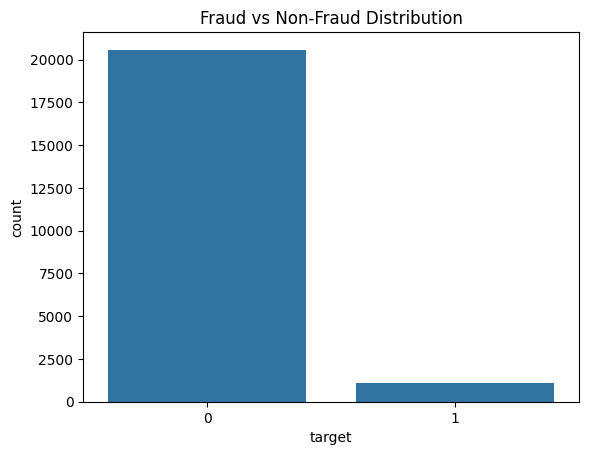

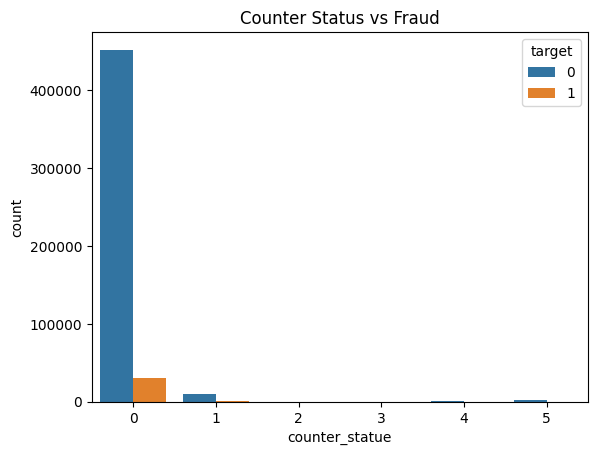

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize fraud distribution
sns.countplot(x='target', data=client_df)
plt.title('Fraud vs Non-Fraud Distribution')
plt.show()

# Visualize counter status and its impact on fraud
sns.countplot(x='counter_statue', hue='target', data=merged_df)
plt.title('Counter Status vs Fraud')
plt.show()

BUILDING LOGISTIC REGRESSION MODEL

Using train and test sets for training and prediction respectively


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the logistic regression model
log_reg = LogisticRegression(random_state=0)

# Fit the model to the training data
log_reg.fit(xtrain, ytrain)

LogisticRegression(random_state=0)

In [12]:
y_pred = log_reg.predict(xtest)

# Print evaluation metrics
print("Accuracy:", accuracy_score(ytest, y_pred))
print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred))
print("Classification Report:\n", classification_report(ytest, y_pred))

Accuracy: 0.9382462360825712
Confusion Matrix:
 [[139716      4]
 [  9192      2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97    139720
           1       0.33      0.00      0.00      9194

    accuracy                           0.94    148914
   macro avg       0.64      0.50      0.48    148914
weighted avg       0.90      0.94      0.91    148914



In [13]:
## Retrieve feature names (after scaling)
feature_names = merged_df.drop(columns=['target', 'id', 'date_x', 'date_y']).columns

## Print coefficients with feature names
for feature, coef in zip(feature_names, log_reg.coef_[0]):
    print(f"{feature}: {coef:.4f}")

tarif_type: -0.0481
counter_statue: -0.0092
reading_remarque: 0.0203
consommation_level_4: 0.0268
months_number: -0.0251
counter_type: -0.0062
counter_coefficient: -0.1265
consommation_level_1: 0.0625
consommation_level_2: 0.0051
consommation_level_3: 0.1130
region: 0.1280
dis: 0.2723
catg: 0.1229
year: -0.0160
month: -0.0038


RUNNING CROSS VALIDATION ON LOGISTIC REGRESSION (WITHOUT FEATURE SELECTION)

Uses the full dataset, and letting the KFold CV algorithm create its own train and test sets with each iteration

In [14]:
from sklearn.model_selection import cross_val_score, KFold

xval_std = StandardScaler().fit_transform(xval)

k_folds = KFold(n_splits=10)

scores = cross_val_score(LogisticRegression(), xval_std, yval, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.93627866 0.93551311 0.94901084 0.94008622 0.93561384 0.93138321
 0.93498932 0.9412535  0.94159599 0.92777565]
Average CV Score:  0.9373500355073503
Number of CV Scores used in Average:  10


RUNNING STRATIFIED KFOLD CROSS VALIDATION

Rationale: better handling of imbalanced data

In [15]:
from sklearn.model_selection import StratifiedKFold

sk_folds = StratifiedKFold(n_splits=10)

scores = cross_val_score(LogisticRegression(), xval_std, yval, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.93740683 0.93740683 0.93736653 0.93734639 0.9373061  0.93732624
 0.93732624 0.93736527 0.93734513 0.93734513]
Average CV Score:  0.9373540675601818
Number of CV Scores used in Average:  10


IMPLEMENTING KNN CLASSIFIER

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model
knn.fit(xtrain, ytrain)

# Make predictions on the test set
y_pred = knn.predict(xtest)

print("Accuracy:", accuracy_score(ytest, y_pred))
print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred))
print("Classification Report:\n", classification_report(ytest, y_pred))

In [14]:
import statsmodels.api as sm

def backward_stepwise_selection(X, y, significance_level=0.05):
    # Start with all features
    features = list(X.columns)
    while len(features) > 0:
        # Add constant for intercept and create model
        X_with_const = sm.add_constant(X[features])
        model = sm.Logit(y, X_with_const).fit(disp=False)
        
        # Get p-values for the features
        p_values = model.pvalues.iloc[1:]  # Exclude intercept's p-value
        max_p_value = p_values.max()       # Highest p-value among features
        
        # Remove the feature with the highest p-value if above significance level
        if max_p_value > significance_level:
            excluded_feature = p_values.idxmax()  # Get feature with highest p-value
            features.remove(excluded_feature)     # Remove the feature
        else:
            break
    
    # Final model after backward selection
    final_model = sm.Logit(y, sm.add_constant(X[features])).fit(disp=False)
    return final_model, features

# Apply backward stepwise selection
final_model, selected_features_back = backward_stepwise_selection(xtrain, ytrain)

# Output selected features and summary
print("Selected features after backward stepwise selection:", selected_features_back)
print(final_model.summary())


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [59]:
xtrain_selected_back = xtrain[selected_features_back]
xtest_selected_back = xtest[selected_features_back]

In [56]:
# Forward Stepwise Selection with error handling
def forward_stepwise_selection(X, y, significance_level=0.05):
    initial_features = []
    remaining_features = list(X.columns)
    best_features = []

    while len(remaining_features) > 0:
        p_values = pd.Series(index=remaining_features)
        
        for feature in remaining_features:
            try:
                # Test adding each remaining feature to the model
                features_to_test = initial_features + [feature]
                X_with_const = sm.add_constant(X[features_to_test])
                model = sm.Logit(y, X_with_const).fit(disp=False)
                p_values[feature] = model.pvalues[feature]
                
            except (sm.tools.sm_exceptions.PerfectSeparationError, np.linalg.LinAlgError):
                # Skip features that cause perfect separation or convergence issues
                p_values[feature] = 1.0  # Set p-value high to exclude from selection

        # Select the feature with the lowest p-value
        min_p_value = p_values.min()
        if min_p_value < significance_level:
            best_feature = p_values.idxmin()
            initial_features.append(best_feature)
            remaining_features.remove(best_feature)
            best_features.append(best_feature)
        else:
            break

    # Final model after forward selection
    final_model = sm.Logit(y, sm.add_constant(X[best_features])).fit(disp=False, maxiter = 1000)
    return final_model, best_features

# Apply forward stepwise selection
final_model, selected_features_forward = forward_stepwise_selection(xtrain, ytrain)

# Output selected features and summary
print("Selected features after forward stepwise selection:", selected_features_forward)
print(final_model.summary())

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/Library/Frameworks/Python.framework/Versions/3.10/lib/pyth

Selected features after forward stepwise selection: ['dis', 'catg', 'consommation_level_3', 'region', 'consommation_level_1', 'id', 'consommation_level_4', 'counter_statue', 'reading_remarque', 'year']
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:               347463
Model:                          Logit   Df Residuals:                   347452
Method:                           MLE   Df Model:                           10
Date:                Tue, 29 Oct 2024   Pseudo R-squ.:                 0.01691
Time:                        00:36:46   Log-Likelihood:                -80324.
converged:                       True   LL-Null:                       -81706.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

In [64]:
print(selected_features_forward)
print(selected_features_back)

['catg', 'consommation_level_1', 'consommation_level_3', 'consommation_level_4', 'counter_statue', 'dis', 'id', 'reading_remarque', 'region', 'year']
['catg', 'consommation_level_1', 'consommation_level_3', 'consommation_level_4', 'counter_statue', 'dis', 'id', 'reading_remarque', 'region', 'year']


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the logistic regression model
log_reg = LogisticRegression(random_state=0)

# Fit the model to the training data
log_reg.fit(xtrain_selected_back, ytrain)
y_pred = log_reg.predict(xtest_selected_back)

# Print evaluation metrics
print("Accuracy:", accuracy_score(ytest, y_pred))
print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred))
print("Classification Report:\n", classification_report(ytest, y_pred))


Accuracy: 0.9379440482426098
Confusion Matrix:
 [[139656     64]
 [  9177     17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97    139720
           1       0.21      0.00      0.00      9194

    accuracy                           0.94    148914
   macro avg       0.57      0.50      0.49    148914
weighted avg       0.89      0.94      0.91    148914



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
from sklearn.model_selection import cross_val_score, KFold

xval_std = StandardScaler().fit_transform(xval[selected_features_back])

k_folds = KFold(n_splits=10)

scores = cross_val_score(LogisticRegression(), xval_std, yval, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.93625851 0.93549297 0.94901084 0.94008622 0.93563399 0.93140336
 0.93500947 0.9412535  0.94159599 0.9277958 ]
Average CV Score:  0.9373540647191361
Number of CV Scores used in Average:  10


In [49]:
from sklearn.model_selection import StratifiedKFold

sk_folds = StratifiedKFold(n_splits=10)

scores = cross_val_score(LogisticRegression(), xval_std, yval, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.93738668 0.93738668 0.93736653 0.93734639 0.9373061  0.93734639
 0.93732624 0.93736527 0.93734513 0.93736527]
Average CV Score:  0.9373540676007683
Number of CV Scores used in Average:  10


In [50]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model
knn.fit(xtrain_selected_back, ytrain)

# Make predictions on the test set
y_pred = knn.predict(xtest_selected_back)

print("Accuracy:", accuracy_score(ytest, y_pred))
print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred))
print("Classification Report:\n", classification_report(ytest, y_pred))

Accuracy: 0.9464657453295191
Confusion Matrix:
 [[137680   2040]
 [  5932   3262]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97    139720
           1       0.62      0.35      0.45      9194

    accuracy                           0.95    148914
   macro avg       0.79      0.67      0.71    148914
weighted avg       0.94      0.95      0.94    148914



In [70]:
xtrain_encoded = pd.get_dummies(xtrain_selected_back, columns=['dis', 'catg', 'region', 'counter_statue'], drop_first=True)
xtest_encoded = pd.get_dummies(xtest_selected_back, columns=['dis', 'catg', 'region', 'counter_statue'], drop_first=True)
xtrain_encoded = xtrain_encoded.astype(int)
xtest_encoded = xtest_encoded.astype(int)
print(xtrain_encoded.head())
print(xtest_encoded.head())

            id  reading_remarque  consommation_level_4  consommation_level_1  \
25043   101459                 6                     0                    93   
89796   105147                 8                     0                  1200   
465406  126455                 6                     0                   293   
278446  115749                 9                     0                   800   
39511   102291                 6                     0                   551   

        consommation_level_3  year  dis_62  dis_63  dis_69  catg_12  ...  \
25043                      0  2013       0       0       0        0  ...   
89796                      0  2013       0       0       0        0  ...   
465406                     0  2008       0       1       0        0  ...   
278446                     0  2015       0       1       0        0  ...   
39511                      0  2012       1       0       0        0  ...   

        region_313  region_371  region_372  region_379  region

In [71]:
# Drop duplicates
xtrain_encoded.drop_duplicates(inplace=True)
xtest_encoded.drop_duplicates(inplace=True)

In [73]:
print(xtrain_encoded.shape)
print(ytrain.shape)
print(xtest_encoded.shape)
print(ytest.shape)

(325640, 39)
(347463,)
(144336, 39)
(148914,)


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the logistic regression model
log_reg = LogisticRegression(random_state=0)

# Fit the model to the training data
log_reg.fit(xtrain_encoded, ytrain)
y_pred = log_reg.predict(xtest_encoded)

# Print evaluation metrics
print("Accuracy:", accuracy_score(ytest, y_pred))
print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred))
print("Classification Report:\n", classification_report(ytest, y_pred))
'''
from sklearn.model_selection import cross_val_score, KFold

xval_std = StandardScaler().fit_transform(xval[selected_features_back])

k_folds = KFold(n_splits=10)

scores = cross_val_score(LogisticRegression(), xval_std, yval, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))
from sklearn.model_selection import StratifiedKFold

sk_folds = StratifiedKFold(n_splits=10)

scores = cross_val_score(LogisticRegression(), xval_std, yval, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))
from sklearn.neighbors import KNeighborsClassifier
'''
# Initialize the KNN classifier
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model
knn.fit(xtrain_encoded, ytrain)

# Make predictions on the test set
y_pred = knn.predict(xtest_encoded)

print("Accuracy:", accuracy_score(ytest, y_pred))
print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred))
print("Classification Report:\n", classification_report(ytest, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [325640, 347463]